<a href="https://colab.research.google.com/github/anjaleeDS/CS06/blob/main/Lab3_Lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Line charts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import seaborn as sns

stocks = data.stocks() # from 2000-2010
stocks.shape, stocks.dtypes, stocks.info,  stocks['symbol'].value_counts()

((560, 3),
 symbol            object
 date      datetime64[ns]
 price            float64
 dtype: object,
 <bound method DataFrame.info of     symbol       date   price
 0     MSFT 2000-01-01   39.81
 1     MSFT 2000-02-01   36.35
 2     MSFT 2000-03-01   43.22
 3     MSFT 2000-04-01   28.37
 4     MSFT 2000-05-01   25.45
 ..     ...        ...     ...
 555   AAPL 2009-11-01  199.91
 556   AAPL 2009-12-01  210.73
 557   AAPL 2010-01-01  192.06
 558   AAPL 2010-02-01  204.62
 559   AAPL 2010-03-01  223.02
 
 [560 rows x 3 columns]>,
 MSFT    123
 AMZN    123
 IBM     123
 AAPL    123
 GOOG     68
 Name: symbol, dtype: int64)

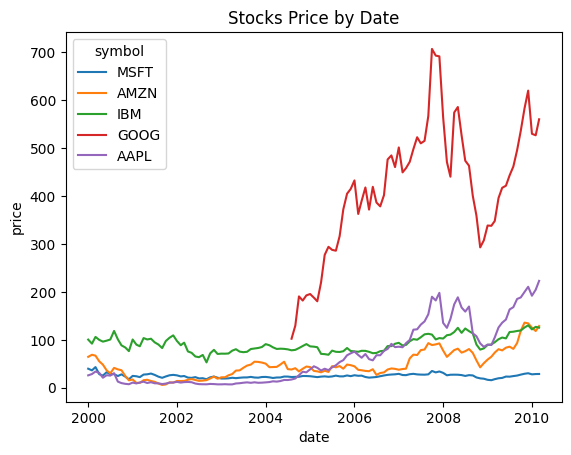

In [ ]:
# plot the line
sns.lineplot(data = stocks, x='date', y = 'price', hue = 'symbol')

# you get the axes labels and the legend *for free* by using sns
plt.title("Stocks Price by Date")
plt.show()

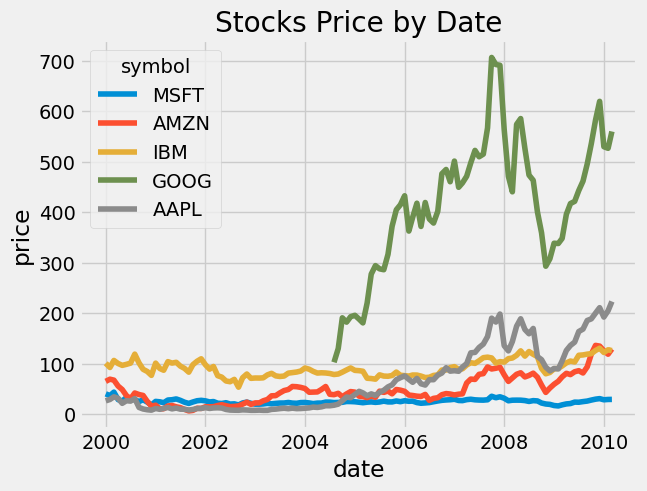

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

sns.lineplot(data = stocks, x='date', y = 'price', hue = 'symbol')
plt.title("Stocks Price by Date")
plt.show()

Found an updated data set for these stocks from 2013-2018

Data on Kaggle [here](https://www.kaggle.com/datasets/camnugent/sandp500?select=all_stocks_5yr.csv)

In [ ]:
appl = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/AAPL_data.csv")
amzn = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/AMZN_data.csv")
goog = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/GOOG_data.csv")
ibm = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/IBM_data.csv")
msft = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/MSFT_data.csv")

In [ ]:
df_stocks = pd.concat([appl, amzn, goog, ibm, msft]) # pd.concat = concatenate the inputs

df_stocks.Name.unique(), df_stocks.dtypes

(array(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype=object),
 date       object
 open      float64
 high      float64
 low       float64
 close     float64
 volume      int64
 Name       object
 dtype: object)

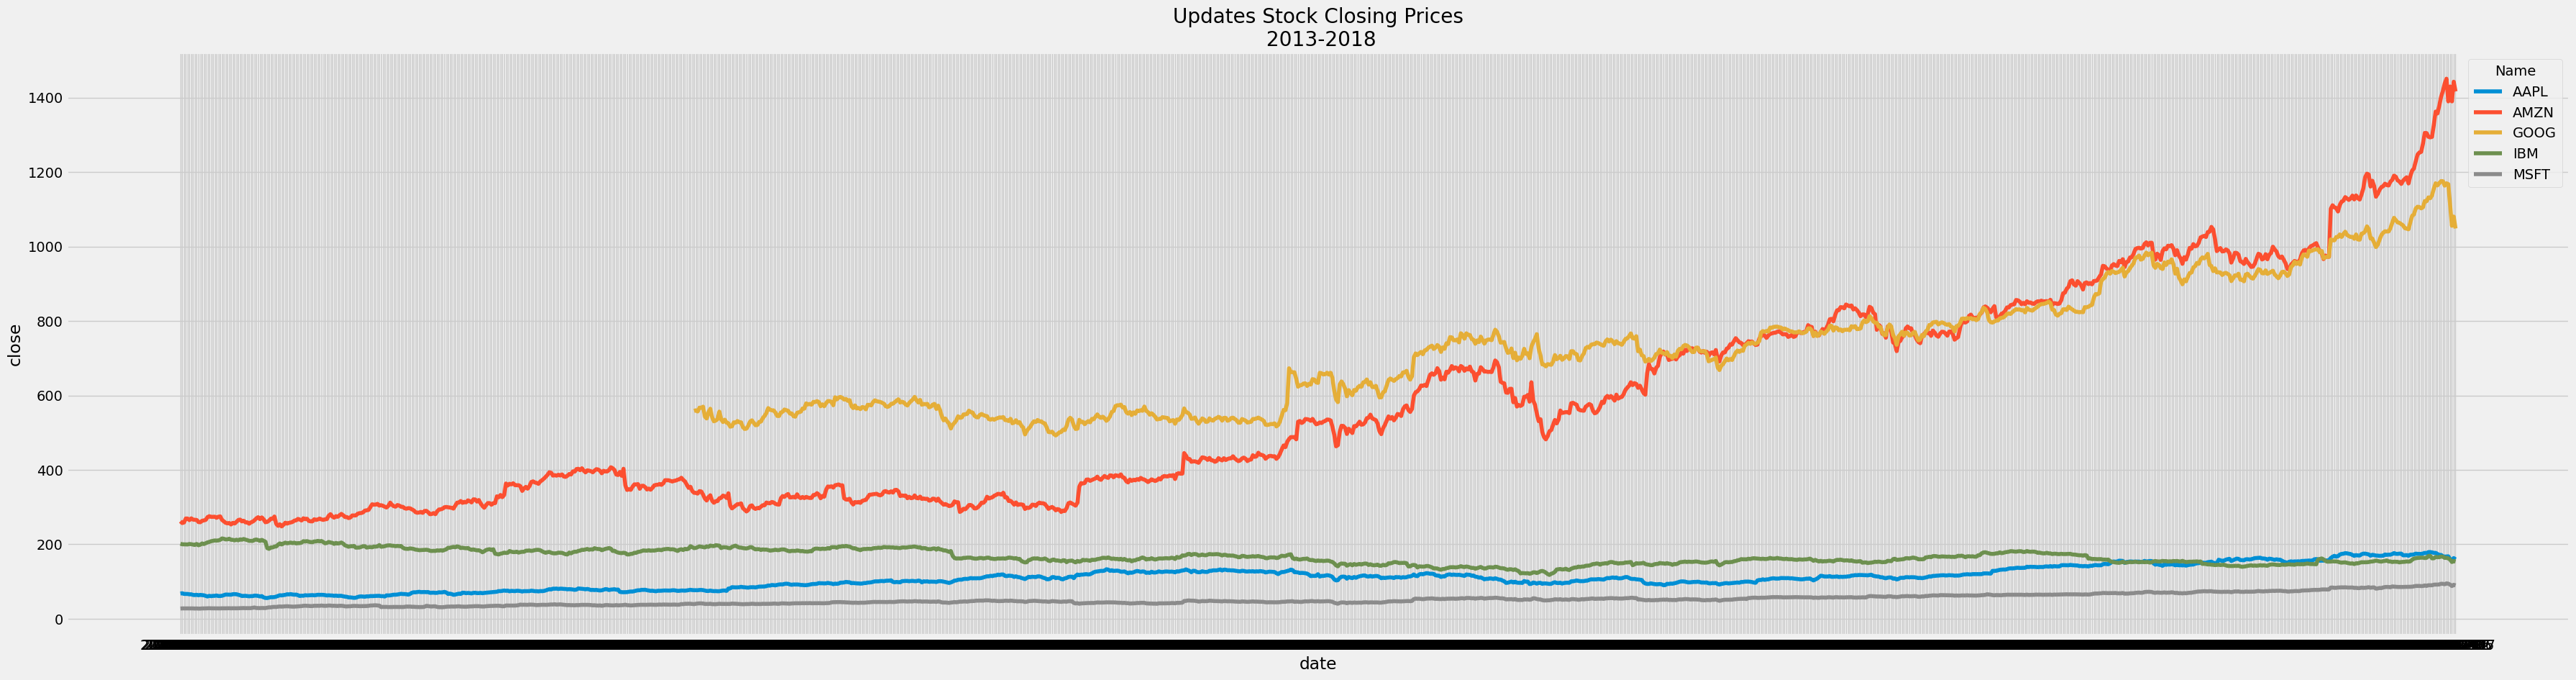

In [ ]:
plt.figure(figsize=(40,10))
sns.lineplot(data=df_stocks, x='date', y='close', hue='Name')
plt.title("Updates Stock Closing Prices\n 2013-2018")
plt.show()

What happened to the dates?? It's type "object"

In [ ]:
# fixing the dates
df_stocks['date'] = pd.to_datetime(df_stocks['date'])
# with this change, the x axis will be treated like a date instead of an object

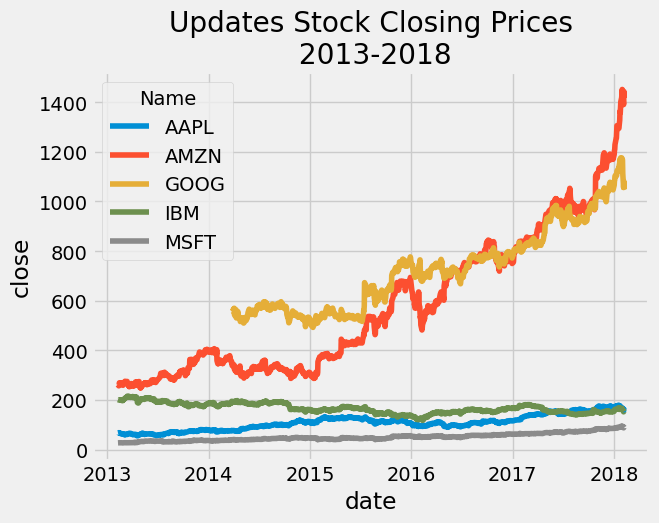

In [ ]:
# plt.figure(figsize=(40,10))
sns.lineplot(data=df_stocks, x='date', y='close',hue = 'Name')
plt.title("Updates Stock Closing Prices\n 2013-2018")
plt.show()

The Magic of **styles**



In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [ ]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

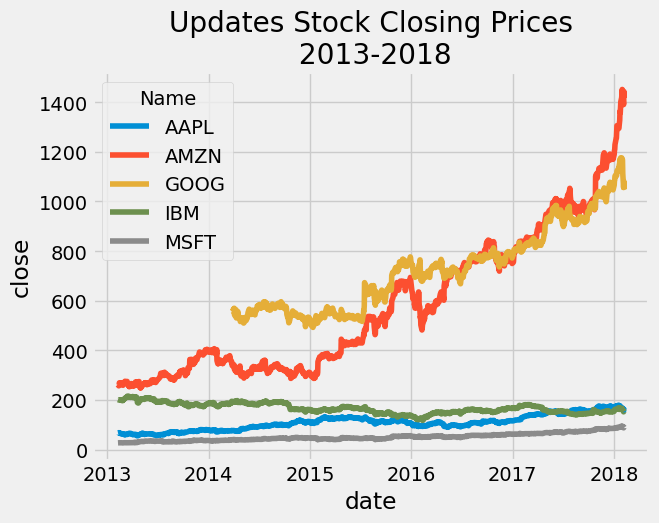

In [ ]:
# plt.figure(figsize=(40,10)) # making the line graph wider

sns.lineplot(data=df_stocks, x='date', y='close',hue = 'Name')

plt.title("Updates Stock Closing Prices\n 2013-2018")
plt.show()

## Using Plotly for Line charts

**Matplotlib is to Seaborn as Plotly is to Plotly Express**

The later library was built to simplify and lessen the code needed to visualize data.

In [ ]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
from vega_datasets import data

appl = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/AAPL_data.csv")
amzn = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/AMZN_data.csv")
goog = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/GOOG_data.csv")
ibm = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/IBM_data.csv")
msft = pd.read_csv("https://github.com/anjaleeDS/cs06/raw/main/MSFT_data.csv")

df_stocks = pd.concat([appl, amzn, goog, ibm, msft])
df_stocks.Name.unique(), df_stocks.dtypes

(array(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype=object),
 date       object
 open      float64
 high      float64
 low       float64
 close     float64
 volume      int64
 Name       object
 dtype: object)

In [ ]:
df_stocks['date'] = pd.to_datetime(df_stocks['date']) # there's a function in pandas called "to_datetime". it changes the type of column into datetime

fig = px.line(df_stocks, x="date", y="close", color="Name", title="plotly version of stocks\n from 2013-2018")
fig.show()

###Let's take a look at what else plotly can do

using movies dataset from kaggle

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from vega_datasets import data

url = "https://raw.githubusercontent.com/anjaleeDS/CS06/main/Netflix%20TV%20Shows%20and%20Movies.csv"
df = pd.read_csv(url)

df.shape, df.dtypes, df['release_year'].value_counts()

((5283, 11),
 index                  int64
 id                    object
 title                 object
 type                  object
 description           object
 release_year           int64
 age_certification     object
 runtime                int64
 imdb_id               object
 imdb_score           float64
 imdb_votes           float64
 dtype: object,
 2019    749
 2018    733
 2021    687
 2020    657
 2017    555
        ... 
 1974      1
 1959      1
 1962      1
 1978      1
 1985      1
 Name: release_year, Length: 66, dtype: int64)

In [ ]:
# I only want to see the movies from 2000 and onwards

df_2000 = df[df['release_year'] >=2000]
df_2000.shape

(5067, 11)

**Let's make a bar chart of the count of movies made every year after 2000**


In [ ]:
df_2000.value_counts() # this will count the number of entries for every unique value


In [ ]:
# let's make a bar chart of the count of movies made every year after 2000


key_of_value=df_2000['release_year'].value_counts().keys().tolist() # takes the key of the value_counts output
count_of_value=df_2000['release_year'].value_counts().tolist() # takes the value or count of the value_counts output
px.bar(df_2000,key_of_value,count_of_value)


In [ ]:
# i'm interested in the movie titles that came out between 2010 and 2019 that are rated G
# g_movies = df_2000[df_2000['age_certification'] =='G']

fig = px.scatter_3d(df, x='runtime', y='imdb_score', z='age_certification', color='type', hover_name='title', hover_data='id', title='Actually this is a 4D plot\n theres x,y,z and color on here')
fig.show()

In [ ]:
# just because you can make it 3D, doesn't mean you should!
# let's go 2D, keep the color type, and ask for the hover-box options to contain the movie rating (age_certification)

fig = px.scatter(df, x='runtime' , y='imdb_score', hover_name='title', hover_data ='age_certification', color='type')
fig.update_xaxes(showgrid=True, gridcolor='LightPink', gridwidth=2)
fig.show()

In [ ]:
df = pd.read_json("https://unpkg.com/vega-datasets@2.7.0/data/cars.json")
fig = px.scatter(df, x='Miles_per_Gallon', y='Horsepower',
           color = 'Origin', size='Weight_in_lbs',
           hover_name ='Name', hover_data='Cylinders', facet_col='Cylinders')
fig.update_layout(title=('Cylinder Data \n Lower power means more efficient gas usage'))

In [ ]:
# what about multiple histogram graphs?

fig = px.histogram(df, x='release_year', y='imdb_score', facet_col="type", histfunc='avg') #histfunc parameter allows the histogram to show by total, avg,min or max
fig.update_xaxes(showline= True, linewidth=2, linecolor="black")
fig.update_yaxes(showline= True, linewidth=2, linecolor="red")
fig.show()

#How to recreate the women college major graph with 538 style from class

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

edu_data = pd.read_csv('https://raw.githubusercontent.com/johnashu/datacamp/master/percent-bachelors-degrees-women-usa.csv')
edu_data.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [ ]:
# find the majors that have less than 20% (women) from the earliest time, 1970, in row 0

first_row = edu_data.loc[0] # give me row 0 of the edu_data dataframe
# first_row # print this result out and you'll get a list where the index is the major and the value is the percentage of women in it

under_20_pct = first_row[first_row.values < 20] # create another list with only the majors that have the value less than 20
under_20_pct = under_20_pct.index # we just want the names of the majors only and not the value

# --- OR you can use this: majors_under_20 = edu_data.loc[0, edu_data.iloc[0] < 20].index

<Axes: xlabel='Year'>

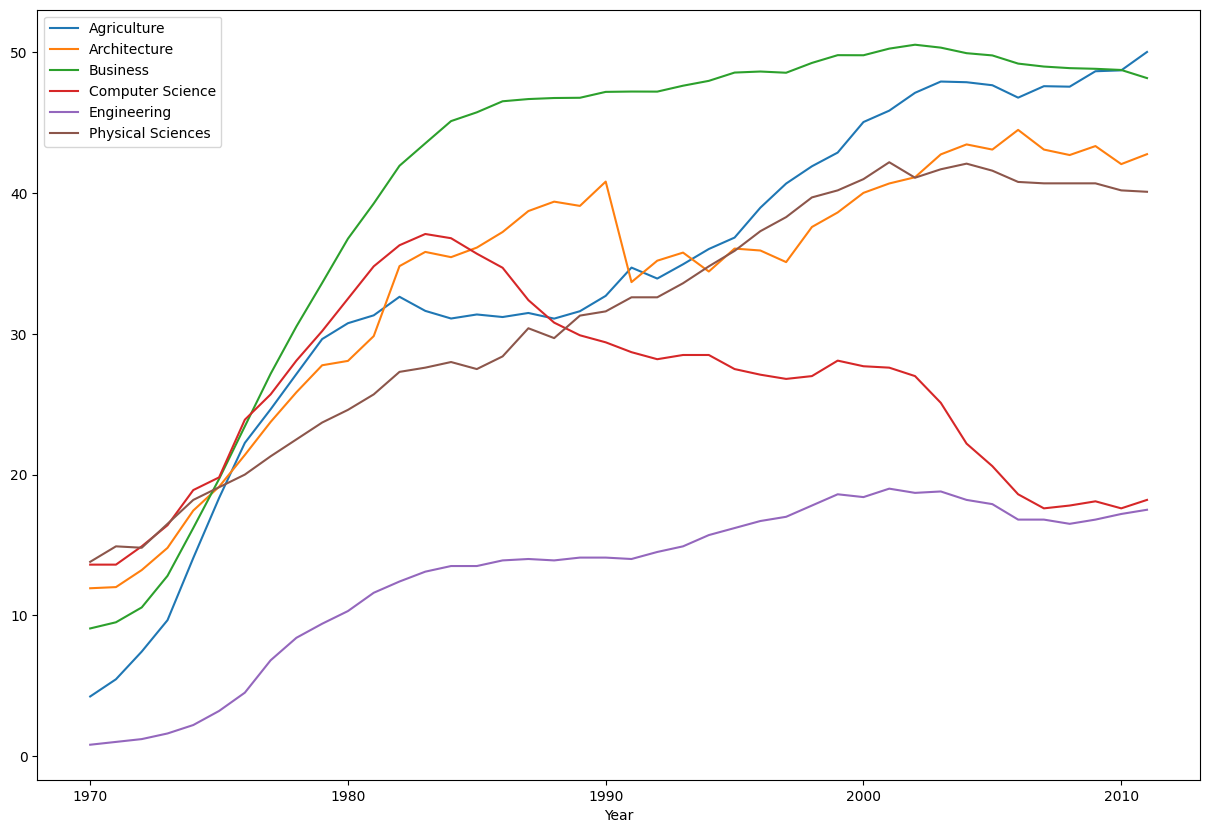

In [ ]:
edu_data.plot(x='Year', y=under_20_pct, figsize=(15, 10)) # before 538 styling

In [ ]:
style.available # list the styles available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='Year'>

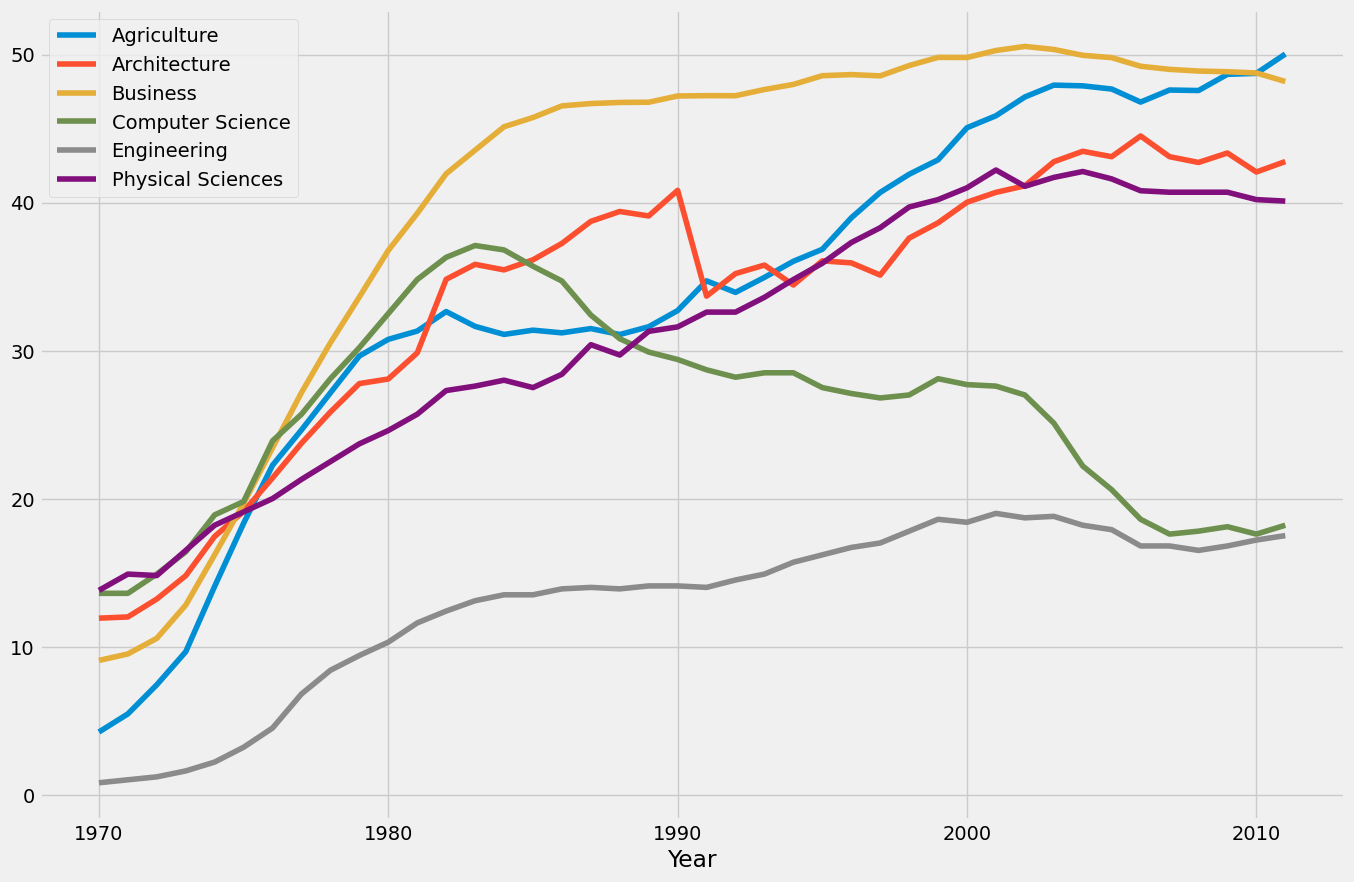

In [ ]:
# Use 538 styling
style.use('fivethirtyeight')
edu_data.plot(x='Year', y=under_20_pct, figsize=(15, 10))

Add the accoutrements to the graph

In [ ]:
# Color blind friendly colors

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

<ipython-input-35-73295ef2cb9a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu_plot.set_yticklabels(labels=['not in use', '0 ', '10 ', '20 ', '30 ', '40 ', '50%'])


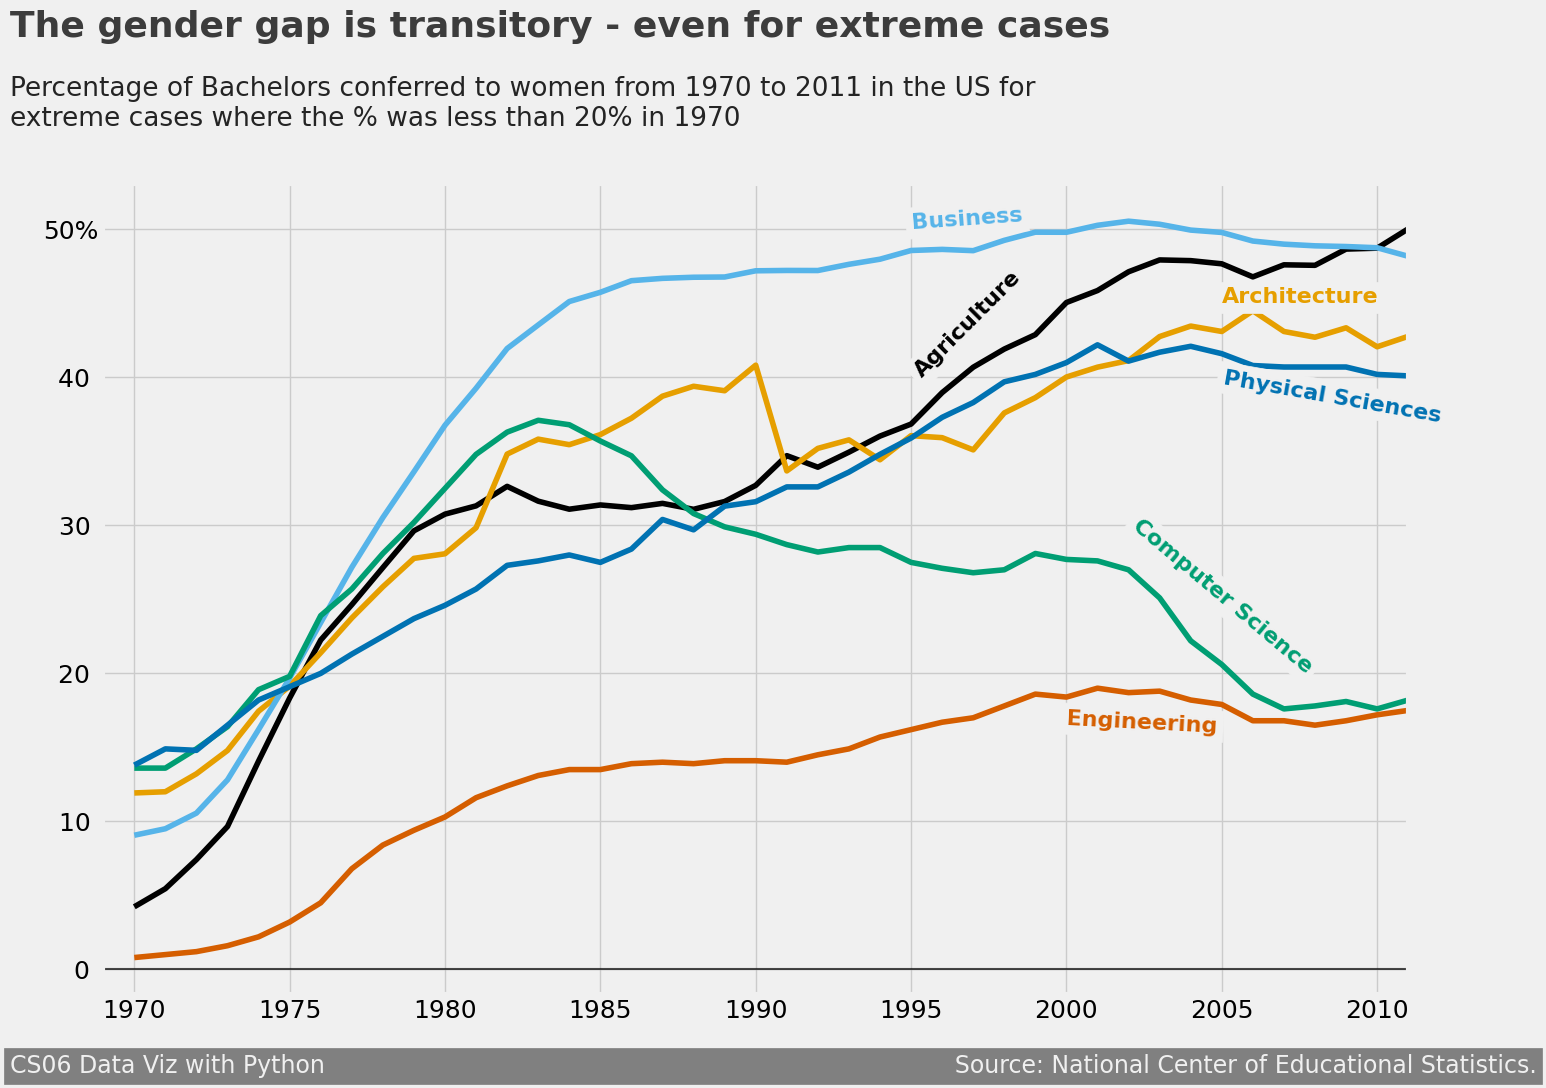

In [ ]:
edu_plot = edu_data.plot(x='Year', y=under_20_pct, figsize=(15, 10), color=colors, legend=False)
edu_plot.axhline(y=0, alpha=0.7, linewidth=1.5, color='black')
edu_plot.tick_params(axis='both', which='major', labelsize=18)
edu_plot.set_yticklabels(labels=['not in use', '0 ', '10 ', '20 ', '30 ', '40 ', '50%'])
edu_plot.set_xlim(left=1969, right=2011)
edu_plot.xaxis.label.set_visible(False)
edu_plot.text(x=1966, y=-7, s="""CS06 Data Viz with Python                   """
              + """                                                          """
              + """       Source: National Center of Educational Statistics.""",
              fontsize=17,
              color="#f0f0f0",
              backgroundcolor='grey'
              )
edu_plot.text(x=1966, y=63, s='The gender gap is transitory - even for extreme cases',
              fontsize=26, weight='bold', alpha=.75
              )
edu_plot.text(x=1966, y=57,
              s='Percentage of Bachelors conferred to women from 1970 to 2011 in the US for \nextreme cases where the % was less than 20% in 1970',
              fontsize=19, alpha=.85
              )

# #Colored Labels Indentifying the Line
edu_plot.text(x = 1995, y = 40, s = 'Agriculture', color = colors[0], weight = 'bold',fontsize=16, rotation = 45,
              backgroundcolor = '#f0f0f0');
edu_plot.text(x = 2005, y = 45, s = 'Architecture', color = colors[1], weight = 'bold',fontsize=16, rotation = 0,
              backgroundcolor = '#f0f0f0');
edu_plot.text(x = 1995, y = 50, s = 'Business', color = colors[2], weight = 'bold',fontsize=16, rotation = 4,
              backgroundcolor = '#f0f0f0');
edu_plot.text(x = 2002, y = 20, s = 'Computer Science', color = colors[3], weight = 'bold',fontsize=16, rotation = -40,
              backgroundcolor = '#f0f0f0');
edu_plot.text(x = 2000, y = 16, s = 'Engineering', color = colors[4], weight = 'bold',fontsize=16, rotation = -3,
              backgroundcolor = '#f0f0f0');
edu_plot.text(x = 2005, y = 37, s = 'Physical Sciences', color = colors[5], weight = 'bold',fontsize=16, rotation = -10,
              backgroundcolor = '#f0f0f0');

# edu_plot.legend()
plt.grid(True)
plt.show()


# Updated women's college areas of study data with Plotly

[Article and source here](https://www.aei.org/carpe-diem/animated-chart-of-the-day-female-share-of-us-bachelors-degrees-1971-to-2020/)

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.style as style

data = pd.read_csv('https://raw.githubusercontent.com/anjaleeDS/CS06/main/college_majors_cleaned.csv')


In [21]:
data.head()

,MAJOR,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ARCHITECTURE,11.9,12.0,13.2,14.8,17.4,19.1,21.4,23.7,25.8,...,42.0,42.8,42.8,43.4,43.7,45.0,46.5,47.1,48.1,48.1
1,ARTS,59.7,59.9,60.4,60.2,61.9,60.9,61.3,62.0,62.5,...,61.3,61.2,61.1,60.8,60.3,60.5,61.3,61.4,62.2,63.1
2,BIOLOGY,29.1,29.4,29.8,31.1,33.0,34.4,36.1,38.3,40.1,...,59.0,58.7,58.6,58.5,59.0,59.9,61.0,62.2,63.2,64.5
3,BUSINESS,9.1,9.5,10.6,12.8,16.2,19.7,23.4,27.2,30.5,...,48.8,48.2,47.9,47.4,47.4,47.2,47.1,47.0,46.7,46.5
4,COMMUNICATION,35.3,35.5,36.6,38.4,40.5,41.5,44.3,46.9,49.9,...,62.5,62.2,62.5,62.9,63.2,63.5,64.1,65.5,65.6,64.2


In [10]:
# grab the college majors that have less than 20% women in 1971
data_20 = data[data['1971']<20]
# data

In [23]:
df = data_20.transpose()

In [24]:
df.columns = df.iloc[0] # set the first row as the column names then
df = df[1:] # drop the first row of df, which is now the header

In [30]:
df = df.reset_index() # have year as a column and not as an index
df.rename(columns={'index': 'year'}, inplace=True)  # renaming df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
df['year'] = pd.to_datetime(df['year']) # change the year column to a datetime type


In [101]:
fig = px.line(df, x='year', y=df.columns[1:],# for the y-values, take each of the columns, starting with the ARCH and make into line
              title='Percent of Women students by College Major',
              labels={'x': 'year', 'y': 'Percent women'})

fig.update_traces(textposition='top center')

fig.add_annotation(x='2020', y=48, text='ARCH')
fig.add_annotation(x='2000', y=50, text='BUSINESS')
fig.add_annotation(x='2010', y=19, text='COMPSCI :(')
fig.add_annotation(x='2000', y=19, text='ENGINEERING')
fig.add_annotation(x='2018', y=40, text='PHYSICS')

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig.add_annotation(
    text = (f"Anja Lee / 2024<br>Source: Department of Education’s National Center for Education Statistics")
    , showarrow=False
    , x = 0
    , y = -0.15
    , xref='paper'
    , yref='paper'
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="grey")
    , align="left"
    ,)

fig.show()

#Python 101

Python, was developed by Guido va Rossum and released around 1991.

It's variables can represent many things:

1. Number and words
2. Excel sheet formatted data (pandas)
3. Functions and Objects (python is OOP)


In [ ]:
# numerics

a = 3
b = 29
c = a+b
c

In [ ]:
# words

x = "Gasline is "
y = "cheap"
x+y

In [ ]:
# lists
# '[]' represents a list

word_list = ["i","am", "awake"]

two_lists = [[1,2,3,4,5], [9.3,5.4, 3.2, 23, 2.1]]

mixed_type_list = [['hello','there','welcome'], [3,2,6], ['about you', 'i love python', 'we are great @ learning']]

# print(two_lists)
print(mixed_type_list)

In [ ]:
# variables with logic

test_score = 65
if test_score > 84:
  print("A - Yay!")
elif (test_score <= 84):
  if (test_score <=65):
    print ("C - Redo!")
  else:
    print("B - Passed!")

In [ ]:
# loops with lists
# while loops, for loops, range() loops

mylist = ['tomato','lettuce','bread','avocado']

x = 1
while (x < 10):
  print(x, " is less than 10")
  x = x+1
print(x, " is now 10")

##########

for i in range(1,len(mylist)): # range() is a method and len()
  print(mylist[i])

# why do we have no TOMATO??   we have no tomato because the range starts from
# 1 and list elements are labeled starting with 0 index

# Pandas

Dataframes, aka excel sheets, google sheets, Numbers app for Mac users, allow us to easily understand and manipulate data sets.

- 1 Row = record
- 1 Column = attribute
- 1 cell = value

- convention to use "df" as dataframe or aka excel sheet

In [ ]:
# create a new dataframe
import pandas as pd

new_df = pd.DataFrame()

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


## Getting data

... but before you can use a dataframe you'll need data from ...

In [ ]:
# get your data from Vega data, a popular repository made available for everyone
# that contains 20 something sets of data.

import pandas as pd
from vega_datasets import data

data.list_datasets() # what data sets are in vega_datasets?
len(data.list_datasets()) # how many was that?

df = data.cars()
df

In [ ]:
# get your data from a URL

import pandas as pd

url = "https://raw.githubusercontent.com/anjaleeDS/cs06/main/shopping_trends_updated.csv"
df = pd.read_csv(url)

df

In [ ]:
# get your data from your google drive
# this is ddirectly from google's codesnippet icon on the lower left
# icon looks like this: < >

import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('Copy of BooksDataset').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
pd.DataFrame.from_records(rows)


In [ ]:
# open a file in your google drive
# also from the code snippet icon on the lower left
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd MyDrive/Cs 06 Winter Data Viz 2024/

filename = "BooksDataset.csv"
df = pd.read_csv(filename)
df

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
MyDrive/


In [ ]:
# open a file downloaded from Kaggle.com or any other dataset source that doesn't have a
# URL that has the data already in a *.csv file format

# NOT IN COLAB download file onto your computer, unzip file, and then upload it to google drive

import pandas as pd
from google.colab import drive

drive.mount("/gdrive", force_remount=True)
# drive.mount('/gdrive')
%cd /gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset/

%ls

#(original files from https://www.kaggle.com/datasets/thedevastator/cdc-covid-19-vaccine-tracker?select=cdc_vaccines_distributed_administered_national_timeseries.csv)

Mounted at /gdrive
/gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset
cdc_vaccines_distributed_administered_by_jurisdiction.csv
cdc_vaccines_distributed_administered_by_jurisdiction_timeseries.csv
cdc_vaccines_distributed_administered_national_timeseries.csv


###Getting data in json format from a webpage

[data source](https://data.sfgov.org/COVID-19/COVID-19-Deaths-by-Population-Characteristics-Over/kkr3-wq7h/about_data)

Looking for empty cells and add them together with

`df.isnull().sum()`

more information on finding nans [here](https://datatofish.com/rows-with-nan-pandas-dataframe/)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import seaborn as sns
import numpy as np


# get data
sf_df = pd.read_json("https://data.sfgov.org/resource/g8m3-pdis.json")
# look at data
sf_df.shape, sf_df.dtypes, sf_df.isnull().sum() # are there nulls? sf_df.isnull().sum() would tell us by column how many there are


((1000, 32),
 ttxid                                 object
 certificate_number                     int64
 ownership_name                        object
 dba_name                              object
 full_business_address                 object
 city                                  object
 state                                 object
 business_zip                          object
 dba_start_date                        object
 dba_end_date                          object
 location_start_date                   object
 location_end_date                     object
 naic_code                             object
 naic_code_description                 object
 parking_tax                             bool
 transient_occupancy_tax                 bool
 supervisor_district                  float64
 neighborhoods_analysis_boundaries     object
 location                              object
 uniqueid                              object
 :@computed_region_6qbp_sg9q          float64
 :@computed_region_qg

In [ ]:
# here are other ways to ask pandas to return records that have null or NaNs in them

sf_df[sf_df['city'].isnull()].head() # look at records that have city as null
sf_df[sf_df['city'].isnull() & sf_df['business_zip'].isnull()].head() # look at records that have city AND zip as null

,ttxid,certificate_number,ownership_name,dba_name,full_business_address,city,state,business_zip,dba_start_date,dba_end_date,...,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,:@computed_region_jwn9_ihcz,mailing_address_1,mail_city,mail_zipcode,mail_state,lic,lic_code_description,business_corridor
21,1138191-02-171,1060494,Giuseppe Pennisi,Pioneer Seafoods,Pier 47 Al Scoma Way Fisherman Warf,NaN,NaN,NaN,2016-10-18T00:00:00.000,2020-05-01T00:00:00.000,...,3.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1177815-02-181,475916,S F Public Utilities Comm,S F Public Utilites Comm,Great Highway & Taraval,NaN,NaN,NaN,2012-02-14T00:00:00.000,NaN,...,NaN,NaN,NaN,525 Golden Gate Ave Fl 13,San Francisco,94102.0,CA,H60,Wells And Well Water,NaN
311,1177817-02-181,475916,S F Public Utilities Comm,S F Public Utilites Comm,Great Highway & Judah,NaN,NaN,NaN,2012-02-14T00:00:00.000,NaN,...,NaN,NaN,NaN,525 Golden Gate Ave Fl 13,San Francisco,94102.0,CA,H60,Wells And Well Water,NaN


In [ ]:
# let's select a smaller set of columns that we will use
my_df = sf_df[['business_zip','city']]

my_df

,business_zip,city
0,94114,San Francisco
1,9529,NaN
2,94108,San Francisco
3,94104,San Francisco
4,94133,San Francisco
...,...,...
995,94510,Benicia
996,94103,San Francisco
997,94121,San Francisco
998,94110,San Francisco


## Looking at your data (aka data discovery)

Things you want to do with your data after getting it into a dataframe:

1. Look at it! 👁
- What type of data do you have?
- what are the statistics of the columns that have numbers only or are an integer/float type?
- what are the unique values in a column like "gender"?
-  do you  have any blanks? what are the number of blanks do you have for each column?
2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
import pandas as pd
from vega_datasets import data

# let's use the cars data set from vega_datasets
df = data.cars()
df

In [ ]:
# Data discovery

df.shape # Things without a () are called attributes, the are part of the df package
df.info() # Things with a () are called methods. they are not part of the package but the df package can use it with some input
df.size # how many cells are there in total or number of rows times number of columns


df.dtypes # what are the data type of each column, but df.info() will give you column name, column type, and memory needs and dtypes!

len(df.columns) # how many columns do we have again?
df.columns # getting a list of column names


df.head # look at the first few rows of your dataframe. df.tail gives the last few rows of your dataframe
df.tail(20) # adding a number tells head attribute to return back a specific number of rows from the bottom of the dataframe


df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


In [ ]:

df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


## Cleaning your data

2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
# LET'S CLEAN!

# Step 1: change headers to be callable in code.

# replace all spaces in headers into '_'
df.columns = df.columns.str.replace(' ', '_')

# change every letter into lower case for all values and headers
df.columns = df.columns.str.lower()
df = df.applymap(lambda x: x.lower())

# change columns to the right type
df.dtypes # check the column types. Does it match with what you think is the data type?

In [ ]:
# many analyses also make a copy of the data and then
# separate out the numerical from the categorical columns

# separate categorical and numerical features
num_df = df.select_dtypes(include=['int64','float64'])
cat_df = df.select_dtypes(exclude=['int64','float64'])

references by plot types:

[matplotlib](https://matplotlib.org/stable/plot_types/index.html)

[seaborn]()